# FGV - FUNDAÇÃO GETULIO VARGAS
## ANÁLISE PREDITIVA AVANÇADA

###### Professores: Gustavo Mirapalheta e Hitoshi Nagano
###### Aluno: Ricardo Lucio Braga Reis

### Estudo de Caso - MNIST
---

**Questão 1:**

Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal?

**Questão 2:**

Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests. Tentem trabalhar a hiperparametrização para aumento do desempenho. Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente. 

---



### Carrega Pacotes

Inicialmente carregou-se todos os pacotes que serão utilizados no desenvolvimento do estudo de caso.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Para padronização dos dados
from sklearn.preprocessing import StandardScaler

# Para separação em amostra de treino e teste
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import GridSearchCV

# Modelos
from sklearn.ensemble import RandomForestClassifier
import keras
print("keras version:", keras.__version__)
import tensorflow as tf
print("tensorflow version:", tf.__version__)
print("GPU support:", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))
from keras import models, layers
from keras.utils import to_categorical

# Métrica de erro
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Dados
from keras.datasets import mnist

keras version: 2.3.1
tensorflow version: 2.2.0
GPU support: True


### Base de Dados - MNIST

Importando e visualizando a base de dados MNIST observam-se 70.000 imagens 28x28. Nesse momento separa-se a base em *base de treino*, com 85.7% (60.000 imagens) dos dados, e *base de teste*, com 14.3% (10.000 imagens) dos dados. É nessário que se faça a *dummificação* da variável *target* para a entrada na rede neural dado que a camada de saída utiliza a função *softmax*, ou seja, ele fará uma classificação multinomial de 0-9. Para isso utilizou-se a função *to_categorical*. Para que o dado esteja ideal para a entrada na rede também será necessário fazer um *reshape*, ou seja, passar de 28x28 para um vetor com 784 posições.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

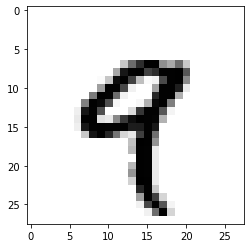

In [0]:
digito = X_train[4]
plt.imshow(digito, cmap = plt.cm.binary)
plt.show()

In [0]:
y_train[4]

9

**Reshape**

 

In [0]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000, 28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

**Dummificação da Variável Target**

In [0]:
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

### Questão 1 - Redes Neurais

Para esse estudo de caso, foram construídos 4 modelos de redes neurais. O primeiro formado por uma camada de entrada com 512 *neurons* e função de ativação *relu*, uma camada de saída com 10 *neurons* e função *softmax*, e será utilizado com dados não normalizados. O segundo possui a mesma arquitetura do primeiro, porém será utilizado com dados normalizados. Já no terceiro, inseriu-se uma camada escondida com 256 *neurons* e função *relu*, e também será utilizado com dados normalizados. No quarto modelo inseriu-se mais uma camada escondida com 128 *neurons* e função *relu*, e também será utilizado com dados normalizados. Todos os modelos serão treinados com 50 épocas, com *input_shape* de 784 colunas, otimizador *rmsprop*, loss *categorical_crossentropy*, validados com 20% da base de treino e avaliados pela acurácia. Através do *summary* é possível observar todas as camadas dos 4 modelos com os respectivos *output shapes*.

Após 50 épocas de treino, comparando inicialmente os modelos 1 e 2, ou seja, o modelo 1 treinado com dados não normalizados e o modelo 2 com dados normalizados, nota-se que o ganho em performance é muito pouco significativo, com acurácia de 99.72% para o modelo 1 e 100% para o modelo 2.

Pegando o mesmo modelo como base e aumentando o número de camadas, podemos observar que o modelo 3 com 3 camadas, e o modelo 4 com 4 camadas, utilizando dados normalizados, não variam muito a acurácia em relação ao modelo 2. Para os dados de teste, os modelos 3 e 4 não obtém um ganho de perfomance em relação ao modelo 2, alcaçando 98.11% e 98.22% de acurácia respectivamente. Portanto aumentar o número de camadas escondidas, para este caso, não traz um ganho significativo que compense o aumento da complexidade do modelo, logo, os modelos 1 e 2 com apenas a camada de entrada e a de saída já obtém um resultado satisfatório em relação aos outros modelos. No quadro abaixo podem-se observar as acurácias dos quatro modelos utilizando dados de treinamento, validação e teste.

</br>
<table>
<tr>
<th></th>
<th>Treinamento</th>
<th>Validação</th>
<th>Teste</th>
</tr>
<tr>
<td>Modelo 1</td>
<td>0.9972</td>
<td>0.9773</td>
<td>0.9782</td>
</tr>
<tr>
<td>Modelo 2</td>
<td>1.0</td>
<td>0.9829</td>
<td>0.9832</td>
</tr>
<tr>
<td>Modelo 3</td>
<td>0.9996</td>
<td>0.9803</td>
<td>0.9811</td>
</tr>
<tr>
<td>Modelo 4</td>
<td>0.9992</td>
<td>0.9779</td>
<td>0.9822</td>
</tr>
</table>

#### Modelo 1 - Dados Não Normalizados

In [0]:
model1 = models.Sequential()

In [0]:
# 1ª Camada
model1.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Camada de Output
model1.add(layers.Dense(10, activation='softmax'))

# Compilando a Rede
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
history1 = model1.fit(X_train, y_train2, validation_split=0.2, batch_size = 128, epochs = 50, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 59us/step - loss: 6.8711 - accuracy: 0.8894 - val_loss: 1.1172 - val_accuracy: 0.9421
Epoch 2/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.8458 - accuracy: 0.9516 - val_loss: 0.8413 - val_accuracy: 0.9532
Epoch 3/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.5278 - accuracy: 0.9649 - val_loss: 0.8539 - val_accuracy: 0.9544
Epoch 4/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.4309 - accuracy: 0.9716 - val_loss: 0.8160 - val_accuracy: 0.9599
Epoch 5/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.3958 - accuracy: 0.9750 - val_loss: 0.8403 - val_accuracy: 0.9641
Epoch 6/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.3350 - accuracy: 0.9797 - val_loss: 0.8713 - val_accuracy: 0.9632
Epoch 7/50
48000/48000 [==============================] - 1s 23us/st

In [0]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

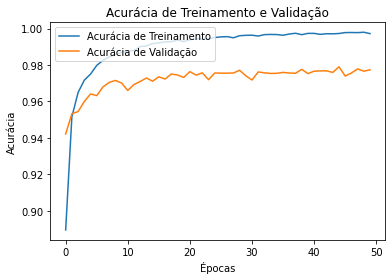

In [0]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict1['accuracy'])
plt.plot(history_dict1['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

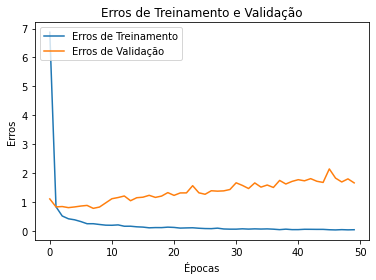

In [0]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict1['loss'])
plt.plot(history_dict1['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
# Teste
model1.evaluate(X_test, y_test2)

10000/10000 [==============================] - 0s 48us/step


[1.6038595747179418, 0.9782000184059143]

#### Modelo 2 - Dados Normalizados

In [0]:
train_images = X_train.astype('float32') / 255
test_images = X_test.astype('float32') / 255

In [0]:
model2 = models.Sequential()

In [0]:
# 1ª Camada
model2.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Camada de Output
model2.add(layers.Dense(10, activation='softmax'))

# Compilando a Rede
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
history2 = model2.fit(train_images, y_train2, validation_split=0.2, batch_size = 128, epochs = 50, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.2843 - accuracy: 0.9176 - val_loss: 0.1483 - val_accuracy: 0.9561
Epoch 2/50
48000/48000 [==============================] - 1s 23us/step - loss: 0.1162 - accuracy: 0.9654 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 3/50
48000/48000 [==============================] - 1s 23us/step - loss: 0.0762 - accuracy: 0.9771 - val_loss: 0.0891 - val_accuracy: 0.9745
Epoch 4/50
48000/48000 [==============================] - 1s 23us/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0862 - val_accuracy: 0.9760
Epoch 5/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.0410 - accuracy: 0.9884 - val_loss: 0.0851 - val_accuracy: 0.9752
Epoch 6/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0780 - val_accuracy: 0.9781
Epoch 7/50
48000/48000 [==============================] - 1s 23us/st

In [0]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

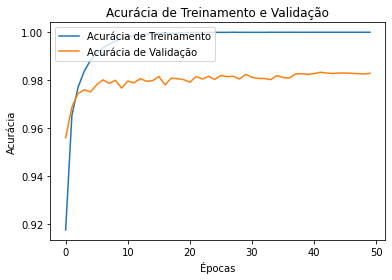

In [0]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict2['accuracy'])
plt.plot(history_dict2['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

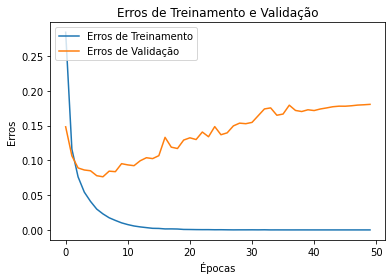

In [0]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict2['loss'])
plt.plot(history_dict2['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
# Teste
model2.evaluate(test_images, y_test2)

10000/10000 [==============================] - 0s 47us/step


[0.14176438022506718, 0.9832000136375427]

#### Modelo 3 - Dados Normalizados - 3 Camadas

In [0]:
model3 = models.Sequential()

In [0]:
# 1ª Camada
model3.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# 2ª Camada Escondida
model3.add(layers.Dense(256, activation = 'relu'))
# Camada de Output
model3.add(layers.Dense(10, activation='softmax'))

# Compilando a Rede
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
history3 = model3.fit(train_images, y_train2, validation_split=0.2, batch_size = 128, epochs = 50, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.2497 - accuracy: 0.9235 - val_loss: 0.1417 - val_accuracy: 0.9561
Epoch 2/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.0925 - accuracy: 0.9715 - val_loss: 0.0999 - val_accuracy: 0.9691
Epoch 3/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0860 - val_accuracy: 0.9763
Epoch 4/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0946 - val_accuracy: 0.9756
Epoch 5/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0848 - val_accuracy: 0.9785
Epoch 6/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.1055 - val_accuracy: 0.9769
Epoch 7/50
48000/48000 [==============================] - 1s 26us/st

In [0]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

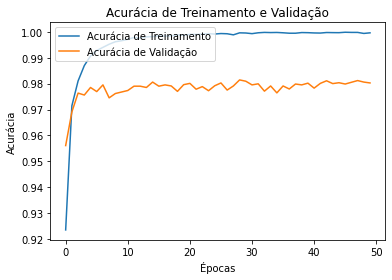

In [0]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict3['accuracy'])
plt.plot(history_dict3['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

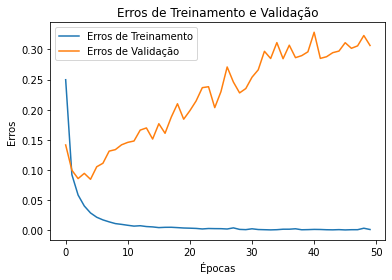

In [0]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict3['loss'])
plt.plot(history_dict3['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
# Teste
model3.evaluate(test_images, y_test2)

10000/10000 [==============================] - 1s 54us/step


[0.29231806451018044, 0.9811999797821045]

#### Modelo 4 - Dados Normalizados - 4 Camadas

In [0]:
model4 = models.Sequential()

In [0]:
# 1ª Camada
model4.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# 2ª Camada Escondida
model4.add(layers.Dense(256, activation = 'relu'))
# 3ª Camada Escondida
model4.add(layers.Dense(128, activation = 'relu'))
# Camada de Output
model4.add(layers.Dense(10, activation='softmax'))

# Compilando a Rede
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
history4 = model4.fit(train_images, y_train2, validation_split=0.2, batch_size = 128, epochs = 50, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.2678 - accuracy: 0.9184 - val_loss: 0.1128 - val_accuracy: 0.9657
Epoch 2/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0965 - accuracy: 0.9705 - val_loss: 0.1030 - val_accuracy: 0.9710
Epoch 3/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.0628 - accuracy: 0.9812 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 4/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 5/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0941 - val_accuracy: 0.9755
Epoch 6/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.1158 - val_accuracy: 0.9769
Epoch 7/50
48000/48000 [==============================] - 1s 27us/st

In [0]:
history_dict4 = history4.history
history_dict4.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

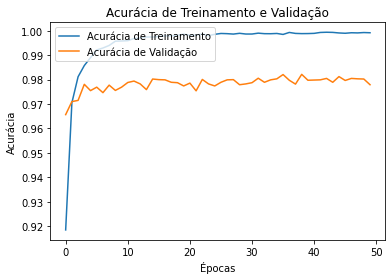

In [0]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict4['accuracy'])
plt.plot(history_dict4['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

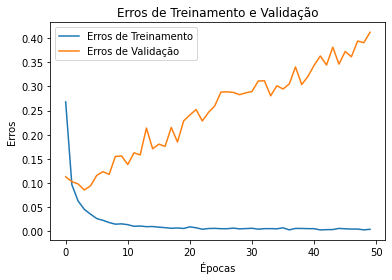

In [0]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict4['loss'])
plt.plot(history_dict4['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
# Teste
model4.evaluate(test_images, y_test2)

10000/10000 [==============================] - 1s 54us/step


[0.29119439663190533, 0.982200026512146]

### Questão 2 - Random Forest

Para o treinamento, implementou-se um *Grid Search* para que fossem treinados vários modelos com diferentes parâmentros, e retornasse o melhor estimador. No espaço de parâmetros optou-se por variar apenas os parâmetros *n_estimators*, *min_sample_leaf* e *min_sample_split* (devido à um alto tempo de processamento), definindo o *oob_score* como true, para que se possa checar o resultado do melhor modelo com as instâncias *Out Of Bag*, e utilizando *cross-validation* com 3 *folds* como estratégia de validação.

Ao final do treinamento, observa-se que o *Grid Search* indicou um melhor estimador com os seguintes parâmetros:

*   n_estimators: 500
*   min_sample_leaf: 1
*   min_samples_split: 2

Logo, para um modelo com 500 árvores e testando com instâncias *out of bag* e dados de teste, ele já alcança uma acurácia de 97%. Portanto, o modelo não alcançou os resultados da rede neural porém, em relação à complexidade do algoritmo, obteve um resultado muito satisfatório, podendo ser usado como *baseline* para comparação.

#### Treinamento

In [0]:
params = {
    "n_estimators" : [100, 500, 1000],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 4],
}

model_RF = RandomForestClassifier(n_jobs=-1, oob_score=True)
model_RF_gs = GridSearchCV(model_RF, param_grid=params, verbose=False, cv = 3)
model_RF_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                   

In [0]:
model_RF_gs.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [0]:
model_RF_gs.best_estimator_.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)>

In [0]:
model_RF_gs.best_estimator_.oob_score_

0.9703833333333334

#### Teste

In [0]:
y_test_pred = model_RF_gs.best_estimator_.predict(X_test)

In [0]:
confusion_matrix(y_test, y_test_pred)

array([[ 970,    0,    0,    0,    0,    3,    2,    1,    3,    1],
       [   0, 1124,    2,    3,    0,    2,    2,    0,    1,    1],
       [   6,    0,  997,    7,    3,    0,    4,    9,    6,    0],
       [   0,    0,    6,  981,    0,    3,    0,    9,    8,    3],
       [   1,    0,    1,    0,  957,    0,    6,    0,    2,   15],
       [   3,    0,    1,   12,    3,  860,    5,    2,    5,    1],
       [   6,    3,    1,    0,    3,    3,  939,    0,    3,    0],
       [   1,    2,   18,    1,    1,    0,    0,  992,    2,   11],
       [   3,    0,    6,    8,    3,    5,    3,    4,  931,   11],
       [   5,    5,    2,    9,   10,    4,    1,    4,    4,  965]])

In [0]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

